# Emoji Prediction
- Step1:-Get the emoji package

In [2]:
import emoji

In [3]:
emoji.EMOJI_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':Afghanistan:': '🇦🇫',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧🇼',
 ':Bouvet_Island:': '🇧🇻',
 ':Brazil:': '🇧🇷',
 ':British_Indian_Ocean_Territory:': '🇮🇴',
 ':British_Virgin_Is

In [4]:
emoji_dictionary={"0":"\u2764\uFE0F",
                  "1":":baseball:",
                   "2":":grinning_face_with_big_eyes:",
                 "3":":disappointed_face:",
                 "4":":fork_and_knife:",
                 "5":":hundred_points:",
                 "6":":fire:",
                 "7":":face_blowing_a_kiss:",
                 "8":":chestnut:",
                 "9":":flexed_biceps:"}

In [5]:
emoji.emojize(":flexed_biceps:")

'💪'

In [6]:
emoji.emojize(":fire:")

'🔥'

In [7]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

❤️
⚾
😃
😞
🍴
💯
🔥
😘
🌰
💪


# Step2-Processing a Custom Datasets 

In [8]:
import numpy as np
#each commas represent the column
import pandas as pd


In [9]:
train=pd.read_csv("train_emoji.csv",header=None)
test=pd.read_csv("test_emoji.csv",header=None)

In [10]:
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [35]:
test.head()

,0,1
0,"[I, want, to, eat]",4
1,"[he, did, not, answer]",3
2,"[he, got, a, raise]",2
3,"[she, got, me, a, present]",0
4,"[ha, ha, ha, it, was, so, funny]",2


In [11]:
#let print sentences with emojis
data=train.values
print(data.shape)
type(train)

(132, 4)


pandas.core.frame.DataFrame

In [12]:
x_train=train[0]
y_train=train[1]

x_test=test[0]
y_test=test[1]

In [34]:
print(x_train)

0                           [never, talk, to, me, again]
1                 [I, am, proud, of, your, achievements]
2                [It, is, the, worst, day, in, my, life]
3                                  [Miss, you, so, much]
4                                       [food, is, life]
5                                    [I, love, you, mum]
6                               [Stop, saying, bullshit]
7                [congratulations, on, your, acceptance]
8                       [The, assignment, is, too, long]
9                                [I, want, to, go, play]
10                     [she, did, not, answer, my, text]
11                     [Your, stupidity, has, no, limit]
12                   [how, many, points, did, he, score]
13                     [my, algorithm, performs, poorly]
14                                    [I, got, approved]
15                              [Stop, shouting, at, me]
16                  [Sounds, like, a, fun, plan, ha, ha]
17                             

In [14]:
for i in range(5):
    print(x_train[i],emoji.emojize(emoji_dictionary[str(y_train[i])]))

never talk to me again 😞
I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


# Step-3 Converting Sentences into Embedding
- Download the Glove 6B.50d.txt

In [15]:
#now we will map each word with the 50 dimension vector
f=open('glove.6B.50d.txt',encoding='utf-8')

In [16]:
embeddings_index={} 
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float')
    embeddings_index[word]=coefs
f.close()

In [17]:
len(embeddings_index)

400000

In [18]:
embeddings_index['eat']

array([ 6.4295e-01, -4.2946e-01, -5.4277e-01, -1.0307e+00,  1.2056e+00,
       -2.7174e-01, -6.3561e-01, -1.5065e-02,  3.7856e-01,  4.6474e-02,
       -1.3102e-01,  6.0500e-01,  1.6391e+00,  2.3940e-01,  1.2128e+00,
        8.3178e-01,  7.3893e-01,  1.5200e-01, -1.4175e-01, -8.8384e-01,
        2.0829e-02, -3.2545e-01,  1.8035e+00,  1.0045e+00,  5.8484e-01,
       -6.2031e-01, -4.3296e-01,  2.3562e-01,  1.3027e+00, -8.1264e-01,
        2.3158e+00,  1.1030e+00, -6.0608e-01,  1.0101e+00, -2.2426e-01,
        1.8908e-02, -1.0931e-01,  3.8350e-01,  7.7362e-01, -8.1927e-02,
       -3.4040e-01, -1.5143e-03, -5.6640e-02,  8.7359e-01,  1.4805e+00,
        6.9421e-01, -3.0966e-01, -9.0826e-01,  3.7277e-03,  8.4550e-01])

In [19]:
emb_dim=embeddings_index['eat'].shape[0]
print(emb_dim)

50


# Step4-converting sentences  into vectors (embedding layer output)

In [20]:
def embedding_output(x):
    max_len=10
    embedding_out=np.zeros((x.shape[0],max_len,emb_dim))
    for ix in range(x.shape[0]):
        x[ix]=x[ix].split()
        for ij in range(len(x[ix])):
            #got to every word in the current (ix) sentences
            try:
                embedding_out[ix][ij]=embeddings_index[x[ix][ij].lower()]
            except:
                embedding_out[ix][ij]=np.zeros((50,))
    return embedding_out
embeddings_matrix_train=embedding_output(x_train)
embedding_matrix_test=embedding_output(x_test)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
print(x_train[0])
print(len(x_train[0]))

['never', 'talk', 'to', 'me', 'again']
5


In [22]:
print(embedding_matrix_test.shape)
print(embeddings_matrix_train.shape)

(56, 10, 50)
(132, 10, 50)


In [23]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [24]:
y_train=to_categorical(y_train,num_classes=5)
y_test=to_categorical(y_test,num_classes=5)

print(y_train.shape)
print(y_test.shape)

(132, 5)
(56, 5)


# Step-5 Define the RNN/LSTM Model 

In [25]:
from keras.models import Sequential
from keras.layers import *

In [26]:
model=Sequential()
model.add(LSTM(64,input_shape=(10,50)))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 29,765
Trainable params: 29,765
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('best_model_emoji.h5',monitor='val_loss',verbose=True,save_best_only=True)
earlystop=EarlyStopping(monitor='val_acc',patience=100)
hist=model.fit(embeddings_matrix_train,y_train,epochs=100,batch_size=64,shuffle=True,validation_split=0.2)

Train on 105 samples, validate on 27 samples
Epoch 1/100
105/105 [==============================] - 0s 4ms/step - loss: 1.5870 - accuracy: 0.2762 - val_loss: 1.6187 - val_accuracy: 0.2222
Epoch 2/100
105/105 [==============================] - 0s 171us/step - loss: 1.5631 - accuracy: 0.2857 - val_loss: 1.6244 - val_accuracy: 0.1852
Epoch 3/100
105/105 [==============================] - 0s 185us/step - loss: 1.5168 - accuracy: 0.3524 - val_loss: 1.6332 - val_accuracy: 0.1481
Epoch 4/100
105/105 [==============================] - 0s 228us/step - loss: 1.5015 - accuracy: 0.3619 - val_loss: 1.6436 - val_accuracy: 0.1852
Epoch 5/100
105/105 [==============================] - 0s 218us/step - loss: 1.5058 - accuracy: 0.3048 - val_loss: 1.6520 - val_accuracy: 0.2222
Epoch 6/100
105/105 [==============================] - 0s 238us/step - loss: 1.4780 - accuracy: 0.3524 - val_loss: 1.6608 - val_accuracy: 0.2222
Epoch 7/100
105/105 [==============================] - 0s 209us/step - loss: 1.4703 - a

Epoch 57/100
105/105 [==============================] - 0s 142us/step - loss: 0.1205 - accuracy: 0.9714 - val_loss: 1.0103 - val_accuracy: 0.7407
Epoch 58/100
105/105 [==============================] - 0s 142us/step - loss: 0.1129 - accuracy: 0.9810 - val_loss: 0.9919 - val_accuracy: 0.7407
Epoch 59/100
105/105 [==============================] - 0s 142us/step - loss: 0.0812 - accuracy: 0.9810 - val_loss: 1.0498 - val_accuracy: 0.7407
Epoch 60/100
105/105 [==============================] - 0s 140us/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 1.0421 - val_accuracy: 0.7407
Epoch 61/100
105/105 [==============================] - 0s 133us/step - loss: 0.0571 - accuracy: 0.9905 - val_loss: 0.9809 - val_accuracy: 0.7037
Epoch 62/100
105/105 [==============================] - 0s 145us/step - loss: 0.0789 - accuracy: 0.9714 - val_loss: 1.0796 - val_accuracy: 0.6667
Epoch 63/100
105/105 [==============================] - 0s 142us/step - loss: 0.0725 - accuracy: 0.9810 - val_loss: 1.1615 -

In [28]:
pred=model.predict_classes(embedding_matrix_test)

In [29]:
pred

array([4, 3, 2, 2, 2, 2, 3, 2, 4, 2, 1, 2, 0, 3, 1, 3, 2, 2, 3, 2, 2, 3,
       4, 2, 3, 3, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 3, 4, 2, 1, 0, 0, 1,
       2, 2, 2, 2, 3, 1, 3, 0, 3, 2, 3, 3], dtype=int64)

In [30]:
model.evaluate(embedding_matrix_test,y_test)

56/56 [==============================] - 0s 107us/step


[1.9515641246523177, 0.5892857313156128]

In [31]:
#without using the early stoppint our accuracy is much higher than the previous one

In [32]:
h=hist.history

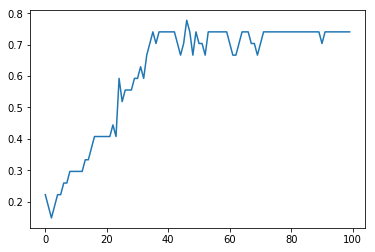

In [36]:
import matplotlib.pyplot as plt 
plt.plot(h['val_accuracy'])


In [37]:
#it is stacked lstm 
model=Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
#so this layer output is going as an input to the next lstm layer
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=False))
#so here we do not want another lstm layer we want it's output to the next layer
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
__________________________________________________

In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint("best_model_emoji_2.h5",monitor='val_loss',verbose=True,save_best_only=True)
earlystop=EarlyStopping(monitor='val_acc',patience=10)
hist=model.fit(embeddings_matrix_train,y_train,epochs=100,batch_size=64,shuffle=True,validation_split=0.2)



Train on 105 samples, validate on 27 samples
Epoch 1/100
105/105 [==============================] - 0s 565us/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.5137 - val_accuracy: 0.7407
Epoch 2/100
105/105 [==============================] - 0s 689us/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.5338 - val_accuracy: 0.7407
Epoch 3/100
105/105 [==============================] - 0s 663us/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.5441 - val_accuracy: 0.7037
Epoch 4/100
105/105 [==============================] - 0s 726us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.5483 - val_accuracy: 0.6296
Epoch 5/100
105/105 [==============================] - 0s 685us/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.5642 - val_accuracy: 0.5926
Epoch 6/100
105/105 [==============================] - 0s 666us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5794 - val_accuracy: 0.5926
Epoch 7/100
105/105 [==============================] - 0s 693us/step - loss: 0.0146 -

Epoch 57/100
105/105 [==============================] - 0s 618us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9158 - val_accuracy: 0.6296
Epoch 58/100
105/105 [==============================] - 0s 614us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.9159 - val_accuracy: 0.6667
Epoch 59/100
105/105 [==============================] - 0s 654us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.9146 - val_accuracy: 0.6667
Epoch 60/100
105/105 [==============================] - 0s 641us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.9153 - val_accuracy: 0.7037
Epoch 61/100
105/105 [==============================] - 0s 588us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.9186 - val_accuracy: 0.7037
Epoch 62/100
105/105 [==============================] - 0s 604us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.9229 - val_accuracy: 0.6667
Epoch 63/100
105/105 [==============================] - 0s 650us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.9276 -

In [43]:
pred=model.predict_classes(embedding_matrix_test)


In [44]:
print(pred)

[4 3 1 2 2 2 1 2 4 2 1 2 0 3 1 3 2 2 3 2 0 3 4 2 3 1 2 0 1 2 0 1 3 2 0 1 2
 4 4 2 1 0 0 1 2 2 2 2 3 1 3 0 3 2 3 0]


In [46]:
model.evaluate(embedding_matrix_test,y_test)

56/56 [==============================] - 0s 288us/step


[2.470307265009199, 0.5892857313156128]

In [56]:
pred=model.predict_classes(embeddings_matrix_train)

In [61]:
for i in range(30):
    print(' '.join(x_train[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(y_train[i]))]))
    print(emoji.emojize(emoji_dictionary[str(pred[i])]))

never talk to me again
😞
😞
I am proud of your achievements
😃
😃
It is the worst day in my life
😞
😞
Miss you so much
❤️
❤️
food is life
🍴
🍴
I love you mum
❤️
❤️
Stop saying bullshit
😞
😞
congratulations on your acceptance
😃
😃
The assignment is too long
😞
😞
I want to go play
⚾
⚾
she did not answer my text
😞
😞
Your stupidity has no limit
😞
😞
how many points did he score
⚾
⚾
my algorithm performs poorly
😞
😞
I got approved
😃
😃
Stop shouting at me
😞
😞
Sounds like a fun plan ha ha
😃
😃
no one likes him
😞
😞
the game just finished
⚾
⚾
I will celebrate soon
😃
😃
So sad you are not coming
😞
😞
She is my dearest love
❤️
❤️
Good job
😃
😃
It was funny lol
😃
😃
candy is life
😃
😃
The chicago cubs won again
⚾
⚾
I am hungry
🍴
🍴
I am so excited to see you after so long
😃
😃
you did well on you exam
😃
😃
lets brunch some day
🍴
🍴


In [59]:
x_train[0]

['never', 'talk', 'to', 'me', 'again']